Preparing dsb data ...
Resampling ...


100%|██████████| 1/1 [00:00<00:00, 331.96it/s]


               open   high    low  close  settle  turnover       volume  \
202404011130  10.52  10.60  10.51  10.58     0.0       0.0   60402300.0   
202404011500  10.58  10.65  10.57  10.64     0.0       0.0   58706500.0   
202404021130  10.63  10.68  10.57  10.60     0.0       0.0   60509100.0   
202404021500  10.60  10.60  10.53  10.55     0.0       0.0   48036700.0   
202404031130  10.53  10.55  10.42  10.45     0.0       0.0   65423600.0   
202404031500  10.44  10.49  10.44  10.46     0.0       0.0   32761000.0   
202404081130  10.42  10.49  10.37  10.43     0.0       0.0   60754200.0   
202404081500  10.43  10.47  10.42  10.43     0.0       0.0   29881900.0   
202404091130  10.43  10.47  10.36  10.39     0.0       0.0   64643800.0   
202404091500  10.40  10.41  10.38  10.40     0.0       0.0   21071900.0   
202404101130  10.38  10.41  10.36  10.39     0.0       0.0   44515600.0   
202404101500  10.40  10.40  10.27  10.28     0.0       0.0   80123500.0   
202404111130  10.24  10.2

100%|██████████| 1/1 [00:00<00:00, 333.15it/s]
C:\Users\chuyin.wang\AppData\Local\Temp\ipykernel_17644\2758078333.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_driver.figure.show()


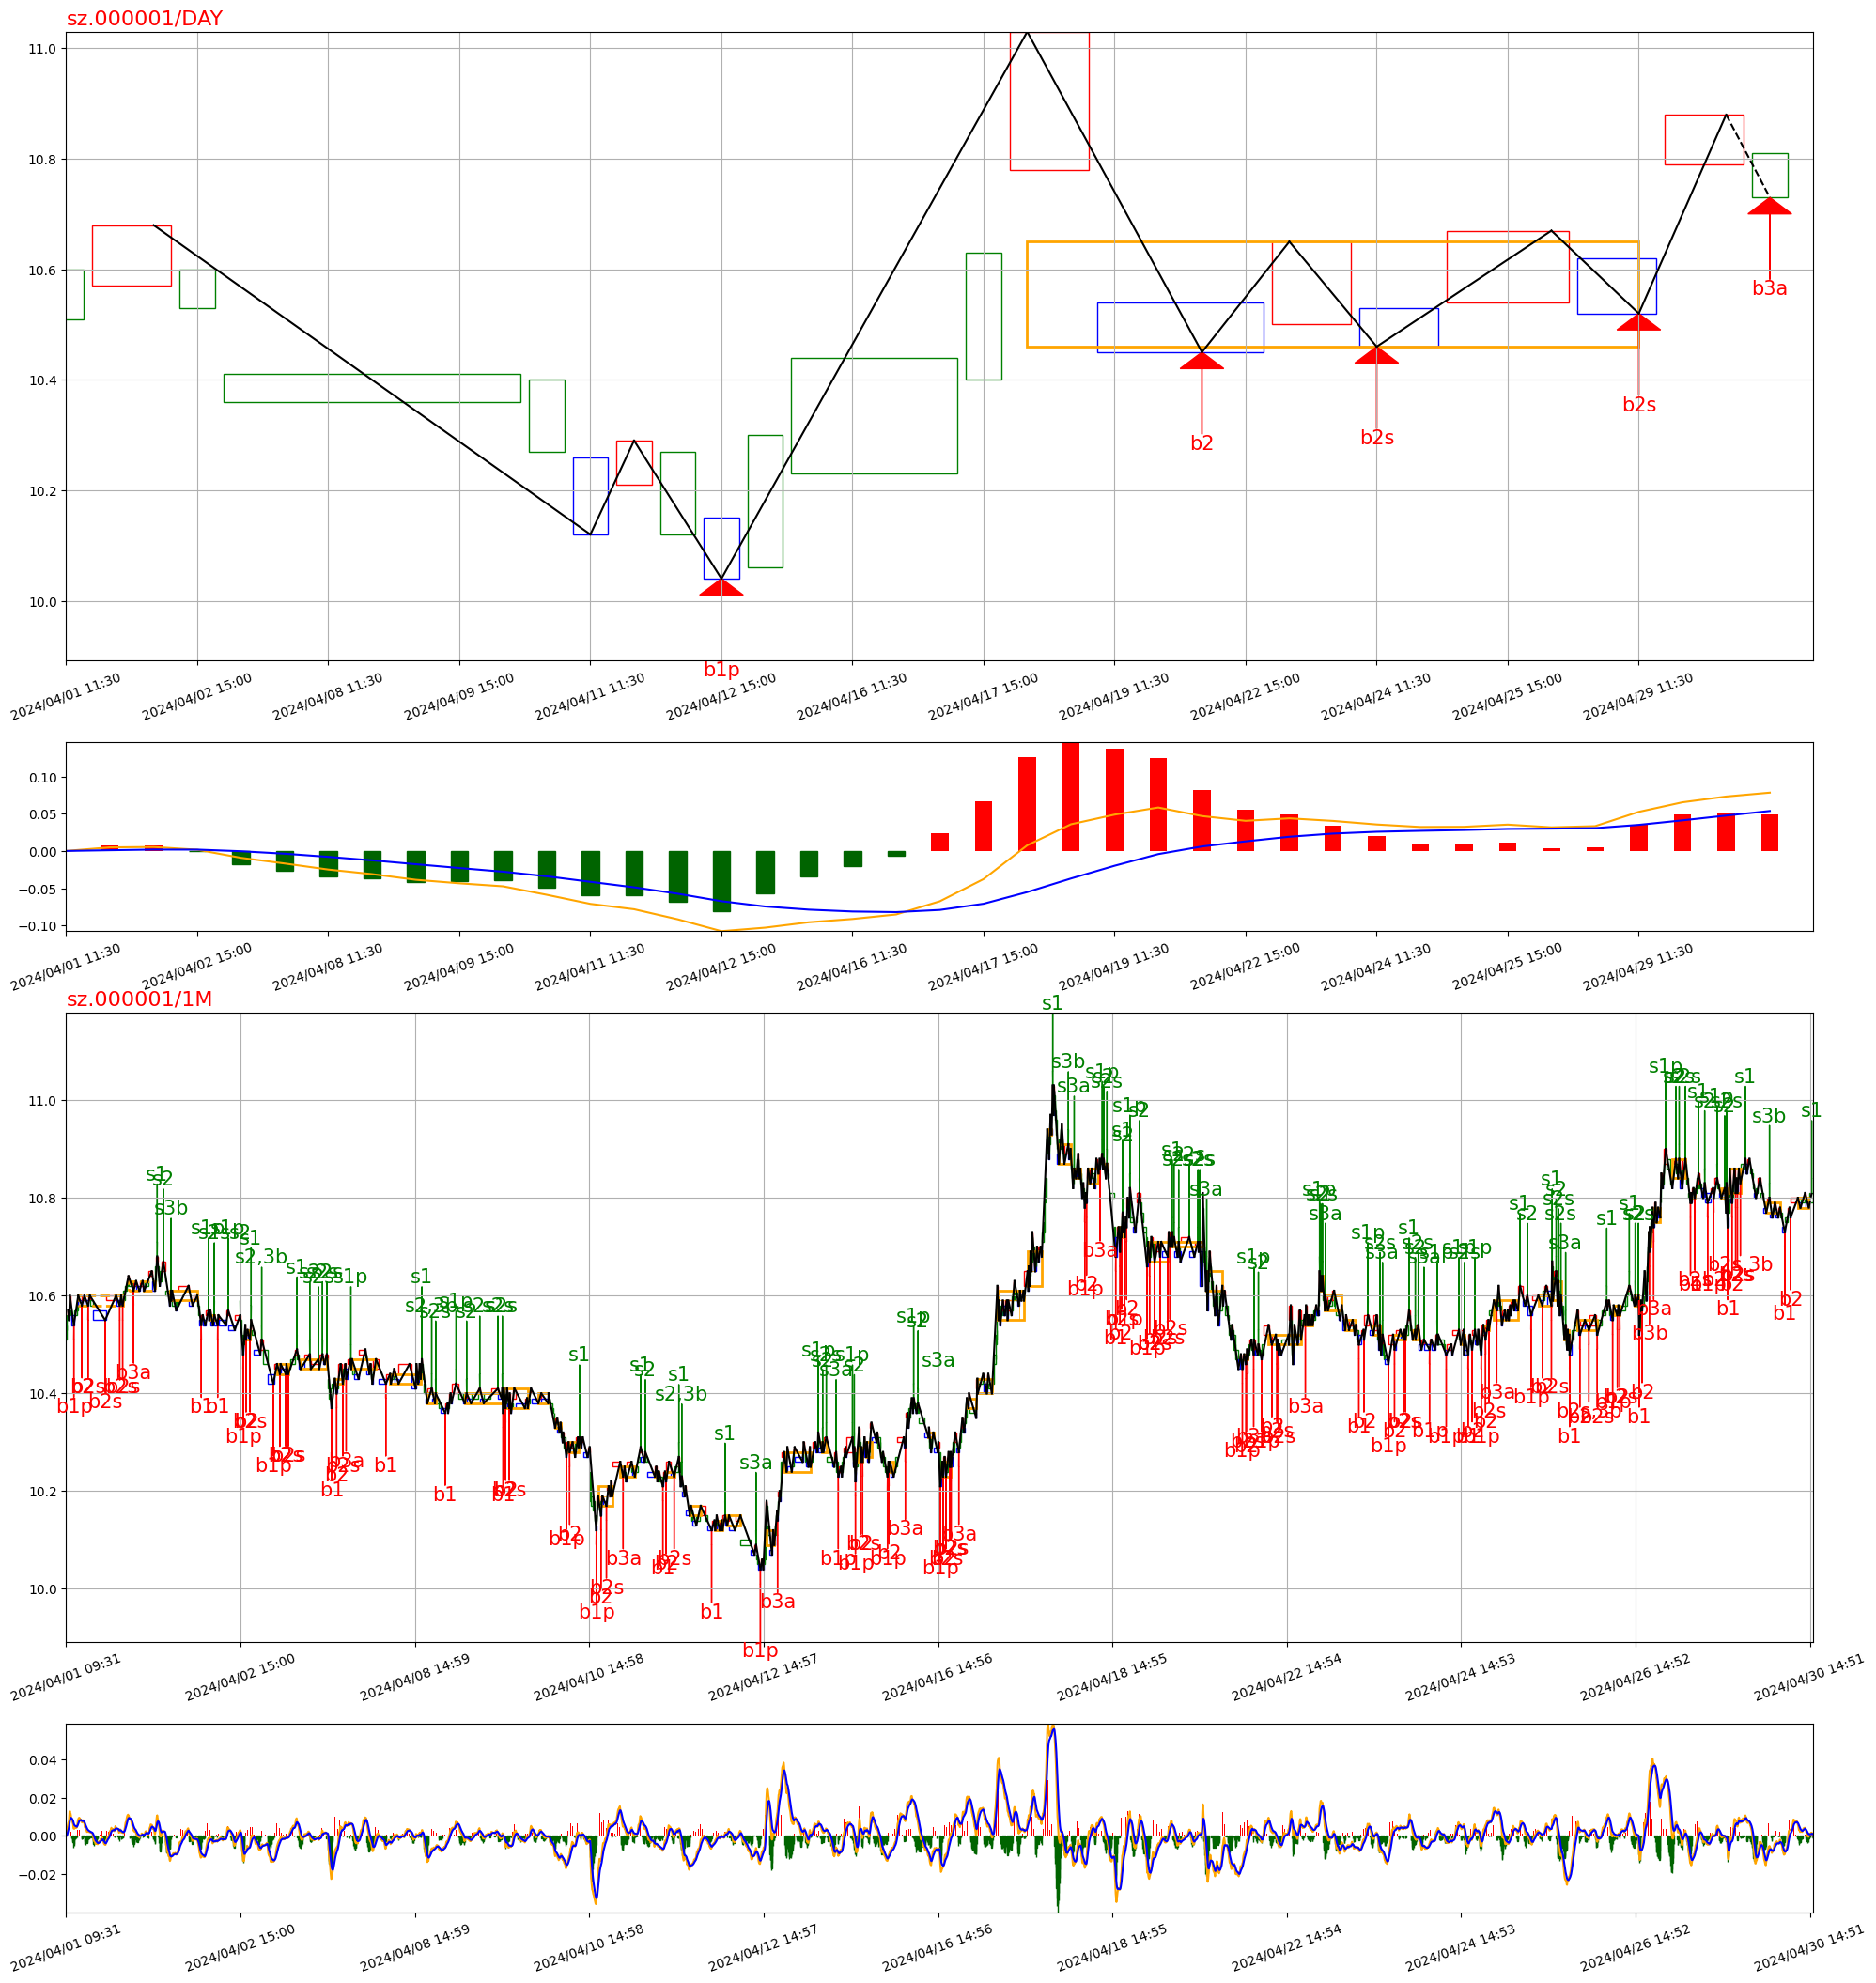

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os, sys
from Chan import CChan
from ChanConfig import CChanConfig
from Common.CEnum import AUTYPE, DATA_SRC, KL_TYPE
from Plot.AnimatePlotDriver import CAnimateDriver
from Plot.PlotDriver import CPlotDriver
sys.path.append("../../")

def main():
    code = "sz.000001"
    begin_time = "2024-03-27"
    end_time = "2024-04-02"
    data_src = DATA_SRC.WT
    lv_list = [KL_TYPE.K_DAY, KL_TYPE.K_1M]

    config = CChanConfig({
        "trigger_step": False,
    })

    plot_config = {
        "plot_kline": False,
        "plot_kline_combine": True,
        "plot_bi": True,
        "plot_seg": False,
        "plot_eigen": False, # 笔的特征序列
        "plot_zs": True,
        "plot_macd": True,
        "plot_mean": False,
        "plot_channel": False,
        "plot_bsp": True,
        #　"plot_extrainfo": False,
        "plot_demark": False,
        "plot_marker": False,
        "plot_rsi": False,
        "plot_kdj": False,
    }

    plot_para = {
        "seg": {
            "plot_trendline": False,
        },
        "bi": {
            "show_num": False,
            "disp_end": False, # show vertex price
        },
        "figure": {
            # "x_range":240,
        },
        "marker": {
            "markers": {  # text, position, color
                # '2024/01/02': ('marker here1', 'up', 'red'),
                # '2024/02/01': ('marker here2', 'down')
            },
        },
        "animation_pause_time": 0
    }
    chan = CChan(
        code=code,
        begin_time=begin_time,
        end_time=end_time,
        data_src=data_src,
        lv_list=lv_list,
        config=config,
        autype=AUTYPE.QFQ,
    )

    if not config.trigger_step:
        plot_driver = CPlotDriver(
            chan,
            plot_config=plot_config,
            plot_para=plot_para,
        )
        # plot_driver.save2img('./image.png')
        plot_driver.figure.show()
    else:
        CAnimateDriver(
            chan,
            plot_config=plot_config,
            plot_para=plot_para,
        )
# input()

if __name__ == "__main__":
    main()